# Projeto 2 - Ciência dos dados

### Integrantes do grupo: 
    João Victor Pazotti
    Rafael Alves Madarás
    Pedro Mahfuz
    Filippo Ferraro
### Turma:
    2 - A

## Proposta do projeto

   Prever a expectativa de vida de um país com base no Ranking de felicidade, Pontuação de felicidade, PIB per capita, Liberdade, Corrupção governamental (Confiança) e Índice de percepção de corrupção (IPC)

---

## _1. Importando Datasets e e bibliotecas utiizadas no projeto_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns; 
from scipy import stats
from math import *
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# importa Datasets usados no código

# indices de felicidade/ confiança no governo/ GDP/ etc 
f_2015_ = pd.read_csv("2015.csv")

# indices de corrupção
co = pd.read_csv("index.csv")

### _1.1. Significado de cada coluna do Dataset:_
    
    Country = País
    Happiness Rank = Ranking de felicidade
    Happiness Score = Pontuação de felicidade
    GDP per Capita = PIB per capita
    Life Expectancy = Expectativa de vida
    Freedom = Liberdade
    Government Corruption (Trust) = Corrupção governamental (Confiança)
    Corruption Perceptions Index (CPI) = Índice de percepção de corrupção (IPC)

---

## _2. Filtrando e reorganizando os Datasets_

In [3]:
# muda nomes da tabela e filtra colunas irrelevantes
f_2015_.columns=["Country","Region","Happiness Rank","Happiness Score","Standard Error","GDP per Capita","Family",
                 "Life Expectancy","Freedom","Government Corruption (Trust)","Generosity","Dystopia Residual"]

nova = f_2015_.drop(columns=["Region","Standard Error","Family","Generosity","Dystopia Residual"])

# printa tabela_nova
nova

,Country,Happiness Rank,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Government Corruption (Trust)
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957
...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.42864,0.59201,0.55191
154,Benin,155,3.340,0.28665,0.31910,0.48450,0.08010
155,Syria,156,3.006,0.66320,0.72193,0.15684,0.18906
156,Burundi,157,2.905,0.01530,0.22396,0.11850,0.10062


In [4]:
# filtra colunas irrelevantes
corrupcao = co.loc[:,["Country","Corruption Perceptions Index (CPI)"]]

# printa tabela_corrupcao
corrupcao

,Country,Corruption Perceptions Index (CPI)
0,New Zealand,90
1,Denmark,90
2,Finland,89
3,Sweden,88
4,Switzerland,86
...,...,...
171,Sudan,14
172,Syria,13
173,Korea (North),12
174,South Sudan,11


In [5]:
# junta tabela_nova e tabela_corrupcao
tabela_completa = pd.merge(nova,corrupcao,on="Country")
tabela_completa

,Country,Happiness Rank,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Government Corruption (Trust),Corruption Perceptions Index (CPI)
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,86
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,78
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,90
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,85
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,82
...,...,...,...,...,...,...,...,...
143,Rwanda,154,3.465,0.22208,0.42864,0.59201,0.55191,54
144,Benin,155,3.340,0.28665,0.31910,0.48450,0.08010,36
145,Syria,156,3.006,0.66320,0.72193,0.15684,0.18906,13
146,Burundi,157,2.905,0.01530,0.22396,0.11850,0.10062,20


---

## _3. Análise exploratória_

### _3.1. Dados gerais_

In [6]:
# estatisticas descritivas sobre o Dataframe principal
tabela_completa.describe()

,Happiness Rank,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Government Corruption (Trust),Corruption Perceptions Index (CPI)
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,78.574324,5.397034,0.853249,0.637566,0.431699,0.143891,43.432432
std,46.015834,1.153823,0.399911,0.238391,0.152869,0.121347,19.572701
min,1.000000,2.839000,0.015300,0.000000,0.000000,0.000000,13.000000
25%,38.750000,4.542000,0.546262,0.478648,0.328630,0.061067,29.750000
50%,77.500000,5.277000,0.919550,0.697535,0.438215,0.106480,38.000000
75%,118.250000,6.295750,1.155523,0.809837,0.555402,0.182365,55.500000
max,158.000000,7.587000,1.690420,1.025250,0.669730,0.551910,90.000000


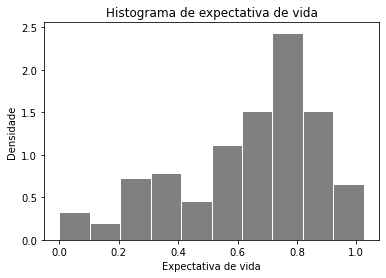

In [7]:
# Hisograma expectativa de vida
plt.hist(tabela_completa["Life Expectancy"], density=True, edgecolor="white",color="grey");
plt.xlabel("Expectativa de vida")
plt.ylabel("Densidade")
plt.title("Histograma de expectativa de vida");

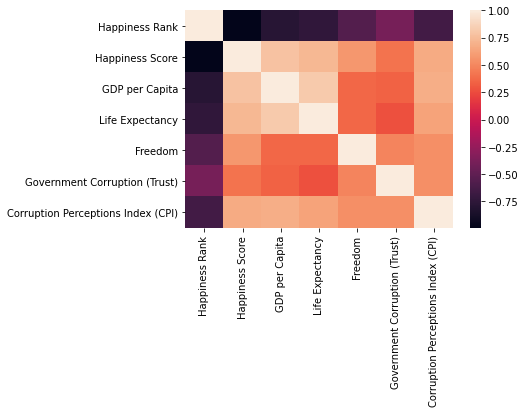

In [8]:
# Correlação entre todas as colunas da tabela
correlacao = tabela_completa.corr()

# mapa de calor da correlação geral da tabela
sns.heatmap(correlacao);

### _3.2. Ranking de felicidade_

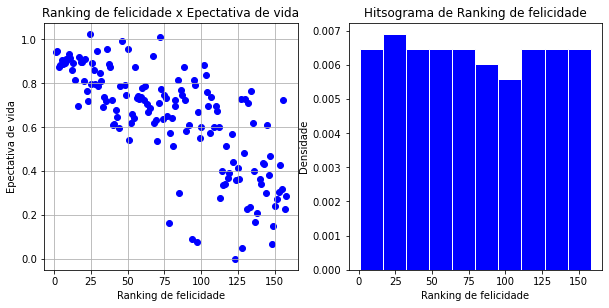

A covariância entre Ranking de felicidade e Expectativa de vida é: -8.08292170987314
A corelação entre Ranking de felicidade e Expectativa de vida é: -0.7368374288925171


In [9]:
fig = plt.figure(figsize=(10,10))

# gráfico de disperção Ranking de felicidade X Epectativa de vida
plt.subplot(2, 2, 1)
plt.scatter(tabela_completa["Happiness Rank"],tabela_completa["Life Expectancy"],color="blue")
plt.grid(True)
plt.xlabel("Ranking de felicidade")
plt.ylabel("Epectativa de vida")
plt.title("Ranking de felicidade x Epectativa de vida")

# Hisograma Ranking de felicidade
plt.subplot(2, 2, 2)
plt.hist(tabela_completa["Happiness Rank"], density=True, edgecolor="white",color="blue");
plt.xlabel("Ranking de felicidade")
plt.ylabel("Densidade")
plt.title("Hitsograma de Ranking de felicidade");

plt.show()

# Correlação e covariância entre Ranking de felicidade e Epectativa de vida
cor_R = tabela_completa["Life Expectancy"].corr(tabela_completa["Happiness Rank"])
cov_R = tabela_completa["Life Expectancy"].cov(tabela_completa["Happiness Rank"])

print("A covariância entre Ranking de felicidade e Expectativa de vida é: {0}".format(cov_R))
print("A corelação entre Ranking de felicidade e Expectativa de vida é: {0}".format(cor_R))

### _3.3. Pontuação de felicidade_

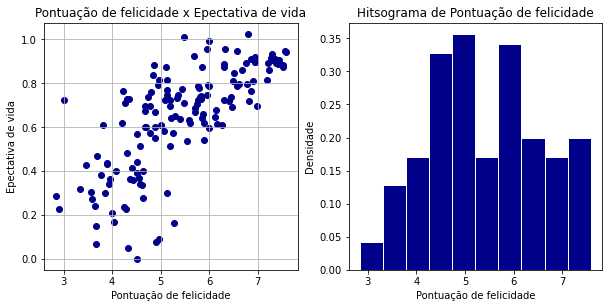

A covariância entre Pontuação de felicidade e Expectativa de vida é: 0.2002303086229086
A corelação entre Pontuação de felicidade e Expectativa de vida é: 0.7279494536032477


In [10]:
fig = plt.figure(figsize=(10,10))

# gráfico de disperção Pontuação de felicidade X Epectativa de vida
plt.subplot(2, 2, 1)
plt.scatter(tabela_completa["Happiness Score"],tabela_completa["Life Expectancy"],color="darkblue")
plt.grid(True)
plt.xlabel("Pontuação de felicidade")
plt.ylabel("Epectativa de vida")
plt.title("Pontuação de felicidade x Epectativa de vida")

# Hisograma Pontuação de felicidade
plt.subplot(2, 2, 2)
plt.hist(tabela_completa["Happiness Score"], density=True, edgecolor="white",color="darkblue");
plt.xlabel("Pontuação de felicidade")
plt.ylabel("Densidade")
plt.title("Hitsograma de Pontuação de felicidade");

plt.show()

# Correlação e covariância entre Pontuação de felicidade e Epectativa de vida
cor_FEL = tabela_completa["Life Expectancy"].corr(tabela_completa["Happiness Score"])
cov_FEL = tabela_completa["Life Expectancy"].cov(tabela_completa["Happiness Score"])

print("A covariância entre Pontuação de felicidade e Expectativa de vida é: {0}".format(cov_FEL))
print("A corelação entre Pontuação de felicidade e Expectativa de vida é: {0}".format(cor_FEL))

### _3.4. PIB per Capita_

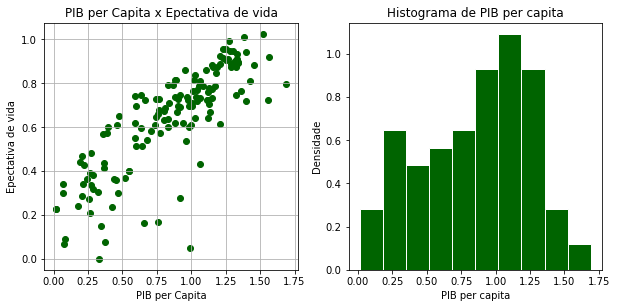

A covariância entre PIB per Capita e Expectativa de vida é: 0.07827745603239561
A corelação entre PIB per Capita e Expectativa de vida é: 0.8210768946316289


In [11]:
# gráfico de disperção PIB per Capita X Epectativa de vida
fig = plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.scatter(tabela_completa["GDP per Capita"],tabela_completa["Life Expectancy"],color="darkgreen")
plt.grid(True)
plt.xlabel("PIB per Capita")
plt.ylabel("Epectativa de vida")
plt.title("PIB per Capita x Epectativa de vida")

# Hisograma PIB per capita
plt.subplot(2, 2, 2)
plt.hist(tabela_completa["GDP per Capita"], density=True, edgecolor="white",color="darkgreen");
plt.xlabel("PIB per capita")
plt.ylabel("Densidade")
plt.title("Histograma de PIB per capita");

plt.show()

# Correlação e covariância entre PIB per Capita e Epectativa de vida
cor_PIB = tabela_completa["Life Expectancy"].corr(tabela_completa["GDP per Capita"])
cov_PIB = tabela_completa["Life Expectancy"].cov(tabela_completa["GDP per Capita"])

print("A covariância entre PIB per Capita e Expectativa de vida é: {0}".format(cov_PIB))
print("A corelação entre PIB per Capita e Expectativa de vida é: {0}".format(cor_PIB))

### _3.5. Liberdade_

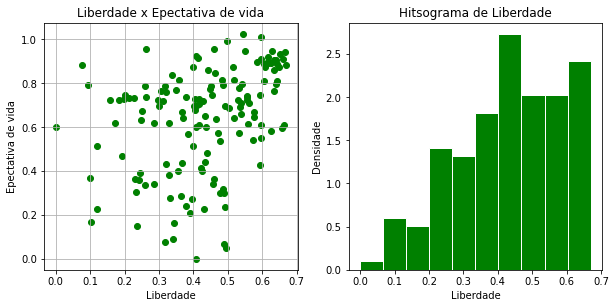

A covariância entre Liberdade e Expectativa de vida é: 0.013283318230189366
A corelação entre Liberdade e Expectativa de vida é: 0.36450094620362283


In [12]:
fig = plt.figure(figsize=(10,10))

# gráfico de disperção Liberdade X Epectativa de vida
plt.subplot(2, 2, 1)
plt.scatter(tabela_completa["Freedom"],tabela_completa["Life Expectancy"],color="green")
plt.grid(True)
plt.xlabel("Liberdade")
plt.ylabel("Epectativa de vida")
plt.title("Liberdade x Epectativa de vida")

# Hisograma Pontuação de felicidade
plt.subplot(2, 2, 2)
plt.hist(tabela_completa["Freedom"], density=True, edgecolor="white",color="green");
plt.xlabel("Liberdade")
plt.ylabel("Densidade")
plt.title("Hitsograma de Liberdade");

plt.show()

# Correlação e covariância entre Liberdade e Epectativa de vida
cor_L = tabela_completa["Life Expectancy"].corr(tabela_completa["Freedom"])
cov_L = tabela_completa["Life Expectancy"].cov(tabela_completa["Freedom"])

print("A covariância entre Liberdade e Expectativa de vida é: {0}".format(cov_L))
print("A corelação entre Liberdade e Expectativa de vida é: {0}".format(cor_L))

### _3.6. Corrupção no governo (confiança)_

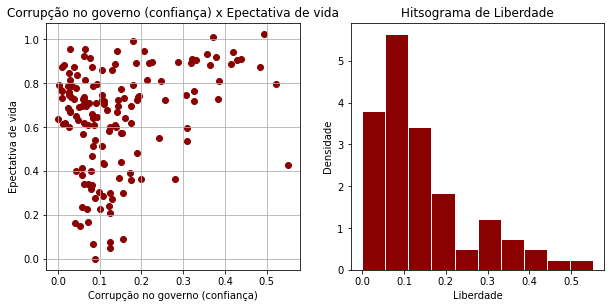

A covariância entre Corrupção no governo (confiança) e Expectativa de vida é: 0.007778010906508542
A corelação entre Corrupção no governo (confiança) e Expectativa de vida é: 0.268875319737776


In [13]:
fig = plt.figure(figsize=(10,10))

# gráfico de disperção Corrupção no governo (confiança) X Epectativa de vida
plt.subplot(2, 2, 1)
plt.scatter(tabela_completa["Government Corruption (Trust)"],tabela_completa["Life Expectancy"],color="darkred")
plt.grid(True)
plt.xlabel("Corrupção no governo (confiança)")
plt.ylabel("Epectativa de vida")
plt.title("Corrupção no governo (confiança) x Epectativa de vida")

# Hisograma Pontuação de felicidade
plt.subplot(2, 2, 2)
plt.hist(tabela_completa["Government Corruption (Trust)"], density=True, edgecolor="white",color="darkred");
plt.xlabel("Liberdade")
plt.ylabel("Densidade")
plt.title("Hitsograma de Liberdade");

plt.show()

# Correlação e covariância entre Liberdade e Epectativa de vida
cor_L = tabela_completa["Life Expectancy"].corr(tabela_completa["Government Corruption (Trust)"])
cov_L = tabela_completa["Life Expectancy"].cov(tabela_completa["Government Corruption (Trust)"])

print("A covariância entre Corrupção no governo (confiança) e Expectativa de vida é: {0}".format(cov_L))
print("A corelação entre Corrupção no governo (confiança) e Expectativa de vida é: {0}".format(cor_L))

### _3.7. Índice de percepção de corrupção_

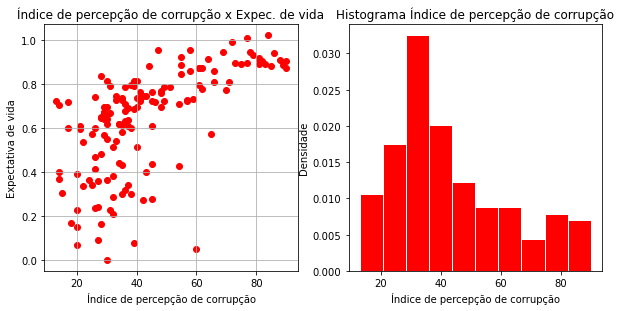

A covariância entre Índice de percepção de corrupção e expectativa de vida é: 2.938291937856224
A corelação entre Índice de percepção de corrupção e expectativa de vida é: 0.62973057578488


In [14]:
fig = plt.figure(figsize=(10,10))

# gráfico de disperção Índice de percepção de corrupção X Epectativa de vida
plt.subplot(2, 2, 1)
plt.scatter(tabela_completa["Corruption Perceptions Index (CPI)"],tabela_completa["Life Expectancy"],color="red")
plt.grid(True)
plt.xlabel("Índice de percepção de corrupção")
plt.ylabel("Expectativa de vida")
plt.title("Índice de percepção de corrupção x Expec. de vida")

# Hisograma Índice de percepção de corrupção
plt.subplot(2, 2, 2)
plt.hist(tabela_completa["Corruption Perceptions Index (CPI)"], density=True, edgecolor="white",color="red");
plt.xlabel("Índice de percepção de corrupção")
plt.ylabel("Densidade")
plt.title("Histograma Índice de percepção de corrupção");

plt.show()


# Correlação e covariância entre Índice de percepção de corrupção e Epectativa de vida
cor_COR = tabela_completa["Life Expectancy"].corr(tabela_completa["Corruption Perceptions Index (CPI)"])
cov_COR = tabela_completa["Life Expectancy"].cov(tabela_completa["Corruption Perceptions Index (CPI)"])

print("A covariância entre Índice de percepção de corrupção e expectativa de vida é: {0}".format(cov_COR))
print("A corelação entre Índice de percepção de corrupção e expectativa de vida é: {0}".format(cor_COR))

---